Part II
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


how to move for random.triagualar -> stats.triang

c = (mode - left) / (right - left)

loc = left

scale = right - left

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts  
n = 60
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

a = (left+right+mode)/3

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

a

1.0

Task 1


In [2]:
sample = np.random.triangular(left, mode, right, size=n)
print(sample)

[ 0.42810728  1.08088565  0.61239991 -0.13290013  0.77683653  2.04845847
  1.33248708  1.44376842  1.03940898  0.01504662  2.11331163  2.22578954
 -0.01381641  1.86725001  0.01393147  1.71464585 -0.0539967   2.74476578
  2.85313686  2.12847961  2.26428301  0.95435141 -1.16175347  0.78222014
  0.98618614 -1.08448928 -0.12262349 -1.41949804  1.35032964 -1.59516157
 -0.34700725  1.70881724 -0.93038179  1.22897982 -0.70632885  2.67128331
  2.7518311   2.07233128  2.9559048   0.81476636  2.77794966  1.00513695
 -0.01035358  1.09873233  0.3328213   1.93693915  1.17570661 -0.05293636
  3.08465074  1.27728492  1.09891101  1.46006182 -0.20348785 -0.27347203
  1.13676787  1.20934691  0.70760993 -0.2366052   1.25499215  1.18535481]


0.6685446160678208


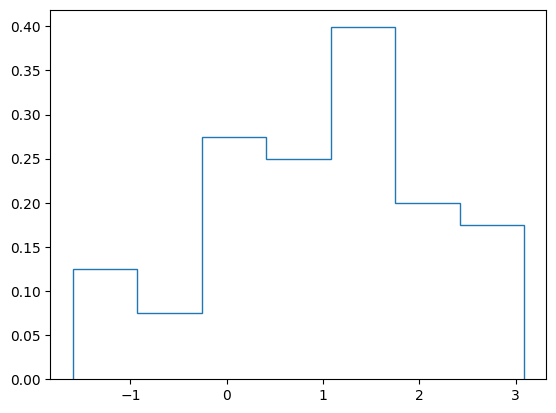

In [50]:
counts, bins = np.histogram(sample, bins="sturges")
h = abs(bins[1]-bins[0])
counts2 = counts/(h*n)
plt.stairs(counts2, bins)

print(h)

In [44]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = sample.min()
max_smpl = sample.max()
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 7
Длина интервала: 0.6685446160678208
Максимальный: 3.0846507445264395
Минимальный элемент: -1.5951615679483062 


In [45]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -1.5951615679483062 - -0.9266169518804854
2 interval: -0.9266169518804854 - -0.25807233581266464
3 interval: -0.25807233581266464 - 0.41047228025515636
4 interval: 0.41047228025515636 - 1.079016896322977
5 interval: 1.079016896322977 - 1.7475615123907975
6 interval: 1.7475615123907975 - 2.416106128458619
7 interval: 2.416106128458619 - 3.0846507445264395


In [46]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')

1 interval: 5
2 interval: 3
3 interval: 11
4 interval: 10
5 interval: 16
6 interval: 8
7 interval: 7

Сумма частот - 1.0


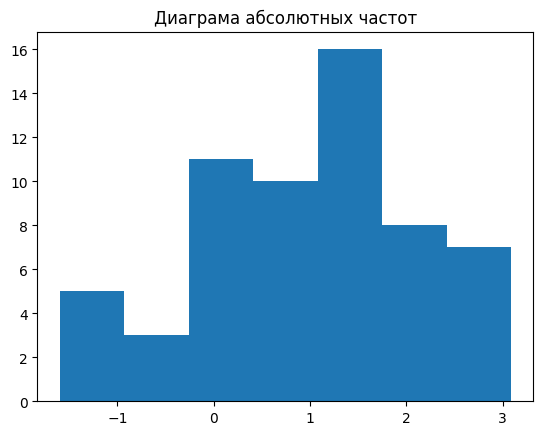

In [6]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [48]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

40.112676964069244
1 interval: 0.12464887358374831
2 interval: 0.07478932415024898
3 interval: 0.27422752188424626
4 interval: 0.24929774716749661
5 interval: 0.3988763954679946
6 interval: 0.1994381977339973
7 interval: 0.17450842301724762


[0.12464887 0.07478932 0.27422752 0.24929775 0.3988764  0.1994382
 0.17450842]
1.4957864830049796


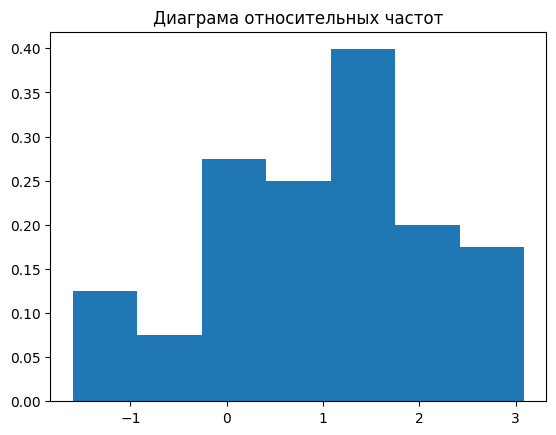

In [8]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

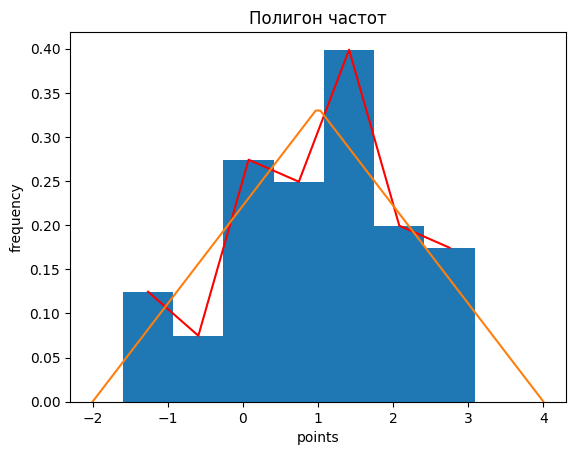

In [9]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.pdf(x, c=my_c, loc=my_loc, scale=my_scale))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [10]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)

Сумма площадей под графиком:  1.0


Function graph

In [11]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


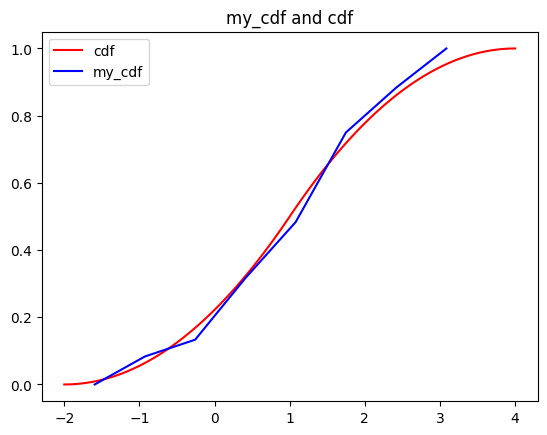

In [12]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.cdf(x, c=my_c, loc=my_loc, scale=my_scale), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-0.011219
0.50,1.089809
0.75,1.752797


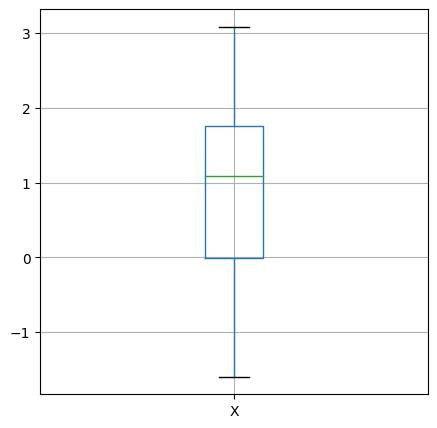

In [13]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [17]:
print(q)
print(f"Вероятность по lib {sts.triang.cdf(a +(q*sigma), c=my_c, loc=my_loc, scale=my_scale)-sts.triang.cdf(a -(q*sigma), c=my_c, loc=my_loc, scale=my_scale)}")

prob = 0
for i in sample:
    if i>a -(q*sigma) and i<a +(q*sigma):
        prob+=1
prob/=n
print(f"Статистическая {prob}")

a +(q*sigma)

1.75
Вероятность по lib 1.0
Статистическая 1.0


6.25

part 4

In [15]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 0.9562908007533117, 
variacne - 1.349338435083808, 
dev - 1.1616102767640306, 
Skewness - -0.16322679279143038, 
Kurtosis - -0.596980822791763


In [16]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')


x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 0.9562908007533117
Эмпирическая дисперсия: 1.326849461165744
Стандартное отклонение: 1.151889517777527
S^2: 1.3493384350838076
Коэффициент ассимметрии: -0.16322679279143051
Коэффициент эксцесса: -0.5969808227917617
